In [1]:
import pandas as pd

#read file names
import os
def list_files_in_directory(directory_path):
    all_entries = os.listdir(directory_path)
    files = [entry for entry in all_entries if os.path.isfile(os.path.join(directory_path, entry))]
    xls_files = [file for file in files if '.xls' in file]
    return xls_files

#Check if a string represents a numeric value.
import re
def is_numeric_string(s):
    return bool(re.match(r'^\d+$', str(s)))

In [2]:
#Organize the data from 2003 to 2009.
#states = ['MA','SP','RJ','TO','PA','SE','MS','PB','RN','AL','GO','MT','RR','BA','CE','MG','PI','ES','RS','PR','PE','AP','SC']
df_2003_to_2009_and_2013_to_2015 = pd.DataFrame()
for year in ['2003','2004','2005','2006','2007','2008','2009','2013','2014','2015']:
    files = list_files_in_directory(str('data/'+year))
    for state in files:
        path = str('data/'+year+'/'+state)
        df = pd.read_excel(path)
        filtered_df = df[df.iloc[:, 0].apply(is_numeric_string)]
        df2 = filtered_df.copy()
        df2['ano'] = year
        df_2003_to_2009_and_2013_to_2015 = pd.concat([df_2003_to_2009_and_2013_to_2015, df2], ignore_index=True)

df_2003_to_2009_and_2013_to_2015#.head(5)

,Nº,UF,Código IBGE,Município,Nº do Decreto,Data do Decreto,Desastre,SE/ECP,Nº da Portaria,Data da Portaria,Nº do D.O.U.,Data do D.O.U.,Rito,ano
0,001,MA,2101707.0,BARREIRINHAS,-,-,VENTOS COSTEIROS (MOBILIDADE DE DUNAS),SE,734.0,2003-07-09 00:00:00,-,2003-07-10 00:00:00,-,2003
1,001,SP,3501301.0,ÁLVARES MACHADO,-,-,INUNDAÇÕES,SE,160.0,2003-03-12 00:00:00,-,2003-03-13 00:00:00,-,2003
2,002,SP,3502804.0,ARAÇATUBA,-,-,CHUVAS INTENSAS,SE,147.0,2003-03-10 00:00:00,-,2003-03-11 00:00:00,-,2003
3,003,SP,3504008.0,ASSIS,-,-,CHUVAS INTENSAS,SE,396.0,2003-04-02 00:00:00,-,2003-04-03 00:00:00,-,2003
4,004,SP,3505401.0,BARRA DO TURVO,-,-,INUNDAÇÕES,ECP,136.0,2003-03-10 00:00:00,-,2003-03-11 00:00:00,-,2003
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19115,070,SC,4219200.0,VIDAL RAMOS,2.545,2015-10-22 00:00:00,CHUVAS INTENSAS,SE,245.0,2015-11-27 00:00:00,228.0,2015-11-30 00:00:00,ORDINÁRIO,2015
19116,071,SC,4219358.0,VITOR MEIRELES,51,2015-10-23 00:00:00,ENXURRADAS,SE,257.0,2015-12-16 00:00:00,241.0,2015-12-17 00:00:00,ORDINÁRIO,2015
19117,072,SC,4219507.0,XANXERÊ,082/2015,2015-04-21 00:00:00,TORNADOS,ECP,69.0,2015-04-22 00:00:00,76.0,2015-04-23 00:00:00,SUMÁRIO,2015
19118,073,SC,4219606.0,XAVANTINA,071/2015,2015-07-14 00:00:00,CHUVAS INTENSAS,SE,176.0,2015-08-12 00:00:00,154.0,2015-08-13 00:00:00,ORDINÁRIO,2015


In [3]:
#Organize the data from 2010 to 2012
#For the years 2010 and 2011, there is no information about 'RITO'
df_2010_to_2012 = pd.DataFrame()
for year in ['2010','2011','2012']:
    files = list_files_in_directory(str('data/'+year))
    for state in files:
        path = str('data/'+year+'/'+state)
        df = pd.read_excel(path)
        filtered_df = df[df.iloc[:, 0].apply(is_numeric_string)]
        df2 = filtered_df.copy()
        df2['ano'] = year
        df2['UF'] = state.split('.')[0]
        df_2010_to_2012 = pd.concat([df_2010_to_2012, df2], ignore_index=True)


#Provide appropriate names for the columns
df_2010_to_2012.columns = ['Nº','Código IBGE ','Município','Nº do Decreto','Data do Decreto','Desastre','SE/ECP','Nº da Portaria','Data da Portaria','Nº do D.O.U.','Data do D.O.U.','ano','UF','Rito']
# Rearrange columns
cols = df_2010_to_2012.columns.tolist() # Convert column names to a list
cols.insert(13, cols.pop(cols.index('ano')))
cols.insert(1, cols.pop(cols.index('UF'))) # Move the 'UF' column to the second position
df_2010_to_2012 = df_2010_to_2012[cols] # Reindex the DataFrame using the rearranged list


df_2010_to_2012.head(5)

,Nº,UF,Código IBGE,Município,Nº do Decreto,Data do Decreto,Desastre,SE/ECP,Nº da Portaria,Data da Portaria,Nº do D.O.U.,Data do D.O.U.,Rito,ano
0,001,MA,2100105,AFONSO CUNHA,25.336,2009-05-04 00:00:00,ENCHENTES,SE,023,2010-01-22 00:00:00,016,2010-01-25 00:00:00,NaN,2010
1,002,MA,2100105,AFONSO CUNHA,015,2010-03-24 00:00:00,ESTIAGEM,SE,496,2010-08-11 00:00:00,154,2010-08-12 00:00:00,NaN,2010
2,003,MA,2100303,ALDEIAS ALTAS,04,2009-05-21 00:00:00,ENXURRADAS,SE,188,2010-03-26 00:00:00,059,2010-03-29 00:00:00,NaN,2010
3,004,MA,2100436,ALTO ALEGRE DO MARANHÃO,25.336,2009-05-04 00:00:00,ENCHENTES,SE,199,2010-03-31 00:00:00,064,2010-04-06 00:00:00,NaN,2010
4,005,MA,2100477,ALTO ALEGRE DO PINDARÉ,25.336,2009-05-04 00:00:00,ENCHENTES,SE,023,2010-01-22 00:00:00,016,2010-01-25 00:00:00,NaN,2010


In [4]:
df_2016 = pd.DataFrame()
year = '2016'
files = list_files_in_directory(str('data/'+year))
for state in files:
    path = str('data/'+year+'/'+state)
    df = pd.read_excel(path)
    filtered_df = df[df.iloc[:, 1].apply(is_numeric_string)]
    df2 = filtered_df.copy()
    df2['ano'] = year
    df2 = df2.iloc[:,1:]
    df_2016 = pd.concat([df_2016, df2], ignore_index=True)

#df_2016 = df_2016.iloc[:,1:]
df_2016.columns = df_2003_to_2009_and_2013_to_2015.columns

df_2016#.head(5)

,Nº,UF,Código IBGE,Município,Nº do Decreto,Data do Decreto,Desastre,SE/ECP,Nº da Portaria,Data da Portaria,Nº do D.O.U.,Data do D.O.U.,Rito,ano
0,1,MA,2103406,Coelho Neto,357,20/11/2015,ESTIAGEM,SE,026,17/02/2016,33,19/02/2016,ORDINÁRIO,2016
1,2,MA,2100600,Amarante do Maranhão,070/2015,27/10/2015,ESTIAGEM,SE,077,30/03/2016,61,31/03/2016,ORDINÁRIO,2016
2,3,MA,2105351,Itaipava do Grajaú,007/2016,10/06/2016,ESTIAGEM,SE,153,12/07/2016,133,13/07/2016,ORDINÁRIO,2016
3,4,MA,2104800,Grajaú,017/2016,20/06/2016,ESTIAGEM,SE,153,12/07/2016,133,13/07/2016,ORDINÁRIO,2016
4,5,MA,2104503,Governador Archer,040,15/07/2016,ESTIAGEM,SE,158,02/08/2016,149,04/08/2016,ORDINÁRIO,2016
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2067,22,SC,4211306,Navegantes,"181, 183, 189.",31/10/2016,CICLONES - MARÉS DE TEMPESTADE (RESSACAS),SE,202,21/11/2016,224,23/11/2016,ORDINÁRIO,2016
2068,23,SC,4203956,Capivari de Baixo,713/2016,17/10/2016,TEMPESTADE LOCAL/CONVECTIVA - VENDAVAL,SE,204,25/11/2016,229,30/11/2016,ORDINÁRIO,2016
2069,24,SC,4202057,Balneário Barra do Sul,1.347,31/10/2016,CICLONES - MARÉS DE TEMPESTADE (RESSACAS),SE,204,25/11/2016,229,30/11/2016,ORDINÁRIO,2016
2070,25,SC,4202503,Bom Jardim da Serra,102/2016,26/10/2016,TEMPESTADE LOCAL/CONVECTIVA - GRANIZO,SE,204,25/11/2016,229,30/11/2016,ORDINÁRIO,2016


In [5]:
#concatenate values of all years (2003 to 2016)
df_s2id = pd.concat([df_2003_to_2009_and_2013_to_2015, df_2010_to_2012,df_2016], ignore_index=True)

In [7]:
#I created subclasses to better agregate the disasters 
classification = pd.read_csv('classification_of_disasters.csv')
df_s2id = df_s2id.merge(classification, left_on='Desastre', right_on='classe_3', how='left')
df_s2id.groupby(['ano', 'classe_2']).size().unstack().fillna(0)

classe_2,ALAGAMENTO,CHUVAS INTENSAS,DESLIZAMENTO,DOENÇA,ENCHENTE,ENXURRADA,EROSÃO,FRENTE FRIA,GEADA,GRANIZO,INCÊNDIO,INFRAESTRUTURA,INUNDAÇÃO,OUTRO,POLUIÇÂO,RESSACA,SECA,SOCIAL,TORNADO,VENDAVAL
ano,,,,,,,,,,,,,,,,,,,,
2003,1.0,118.0,31.0,0.0,0.0,25.0,5.0,0.0,3.0,10.0,10.0,1.0,157.0,3.0,13.0,1.0,897.0,4.0,0.0,46.0
2004,7.0,605.0,1.0,1.0,0.0,128.0,1.0,43.0,0.0,14.0,1.0,1.0,127.0,0.0,1.0,0.0,742.0,0.0,0.0,88.0
2005,4.0,0.0,2.0,1.0,0.0,83.0,1.0,0.0,0.0,9.0,0.0,0.0,26.0,0.0,0.0,0.0,1569.0,1.0,3.0,12.0
2006,9.0,0.0,1.0,2.0,0.0,44.0,5.0,0.0,0.0,6.0,2.0,1.0,25.0,0.0,1.0,0.0,888.0,1.0,0.0,6.0
2007,2.0,1.0,17.0,0.0,0.0,260.0,18.0,0.0,9.0,16.0,2.0,5.0,143.0,0.0,2.0,0.0,1121.0,0.0,1.0,18.0
2008,0.0,0.0,0.0,0.0,0.0,156.0,9.0,11.0,0.0,77.0,0.0,3.0,192.0,1.0,0.0,1.0,1000.0,0.0,1.0,51.0
2009,8.0,0.0,12.0,0.0,0.0,335.0,6.0,0.0,0.0,18.0,0.0,3.0,274.0,1.0,1.0,0.0,608.0,1.0,1.0,24.0
2010,30.0,0.0,29.0,0.0,321.0,877.0,38.0,0.0,6.0,61.0,24.0,1.0,8.0,0.0,0.0,0.0,1093.0,4.0,7.0,266.0
2011,11.0,0.0,12.0,0.0,290.0,735.0,15.0,0.0,1.0,34.0,1.0,0.0,7.0,2.0,0.0,0.0,117.0,3.0,0.0,54.0


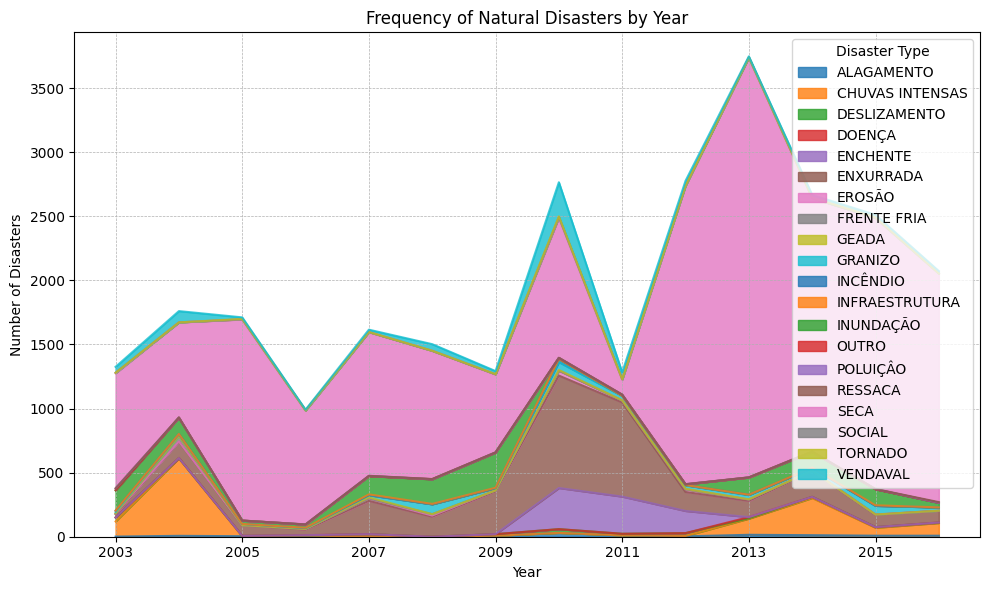

In [9]:
import matplotlib.pyplot as plt

disaster_counts = df_s2id.groupby(['ano', 'classe_2']).size().unstack().fillna(0)

# Plotting
plt.figure(figsize=(10,6))
disaster_counts.plot.area(stacked=True, alpha=0.8, ax=plt.gca())

plt.title('Frequency of Natural Disasters by Year')
plt.xlabel('Year')
plt.ylabel('Number of Disasters')
plt.legend(title='Disaster Type')
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.tight_layout()
plt.show()

In [18]:
#export final dataframe
df_s2id.to_csv('df_s2id.csv', index=False)
